In [1]:
from datetime import datetime
import pandas as pd 
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import ExponentialSmoothing
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [46]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data = pd.read_csv('../ml-project-data/NIFTY-50/2014.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data['Average'] = nifty_data.loc[: , "High":"Low"].mean(axis=1)

#nifty_data = nifty_data.drop(['Open', 'High', 'Low', 'Close'], axis=1)
nifty_data = nifty_data['Average']

In [47]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


nifty_data_test = pd.read_csv('../ml-project-data/NIFTY-50/2015.csv', header=0, 
                                                              parse_dates=['Date'], index_col=0, date_parser=parser)
nifty_data_test['Average'] = nifty_data_test.loc[: , "High":"Low"].mean(axis=1)

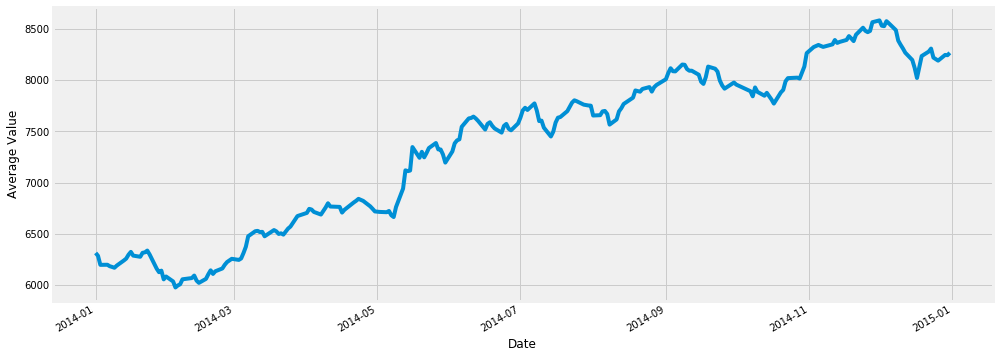

In [49]:
nifty_data.plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [78]:
model1 = ExponentialSmoothing(nifty_data, seasonal_periods=5, trend='add', seasonal='add', damped=True).fit(optimized=True,use_boxcox='log')
model2 = ExponentialSmoothing(nifty_data, seasonal_periods=5, trend='add', seasonal='mul', damped=True).fit(optimized=True,use_boxcox='log')

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [79]:
prediction1 = model1.forecast(int(len(nifty_data)))

prediction2 = model2.forecast(int(len(nifty_data)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


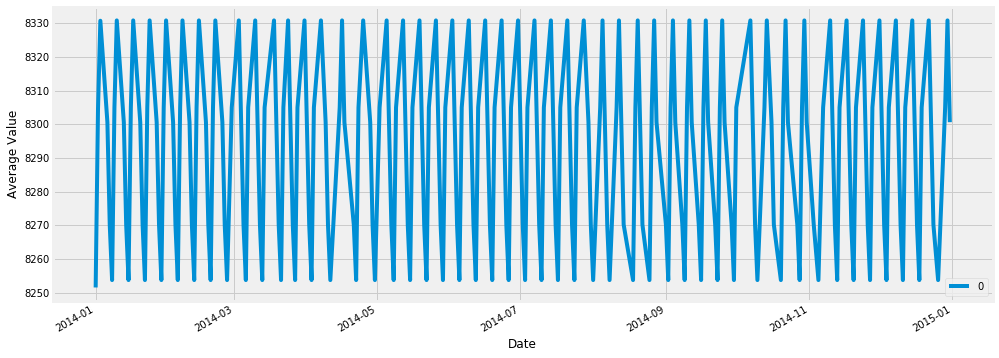

In [80]:
pd.DataFrame(prediction1.values, index = nifty_data.index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

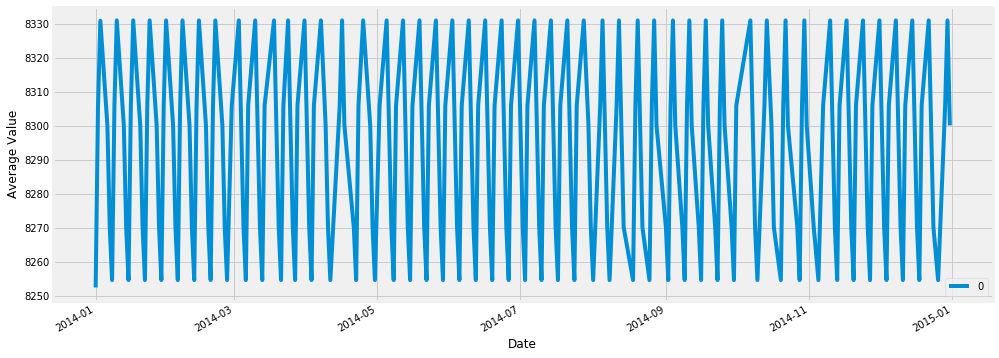

In [81]:
pd.DataFrame(prediction2.values, index = nifty_data.index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

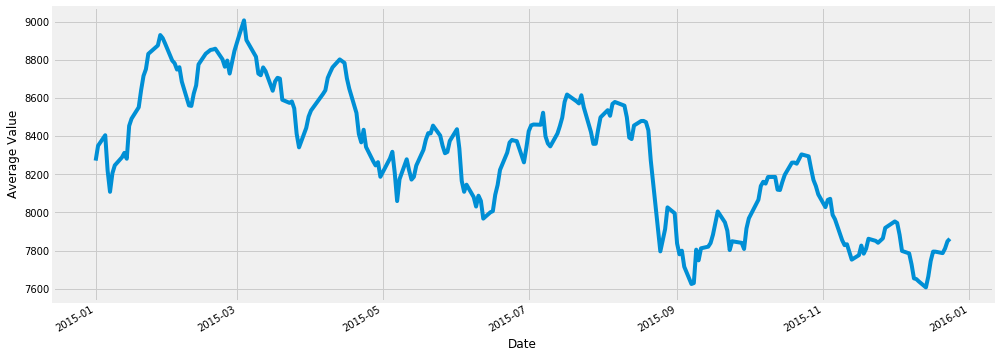

In [82]:
nifty_data_test['Average'][:len(prediction1)].plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [83]:
print('RMSE1: ', np.sqrt(mean_squared_error(prediction1, nifty_data_test['Average'][:len(prediction1)])))

print('MAPE1: ', np.mean(np.abs((nifty_data_test['Average'][:len(prediction1)] - prediction1.values) / nifty_data_test['Average'][:len(prediction1)])) * 100)

RMSE1:  346.9672116573437
MAPE1:  3.5063564209292806


In [84]:
print('RMSE2: ', np.sqrt(mean_squared_error(prediction2, nifty_data_test['Average'][:len(prediction2)])))

print('MAPE2: ', np.mean(np.abs((nifty_data_test['Average'][:len(prediction2)] - prediction2.values) / nifty_data_test['Average'][:len(prediction2)])) * 100)

RMSE2:  346.9491254348806
MAPE2:  3.5061230972707955


In [2]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


TCS_data = pd.read_csv('../ml-project-data/TCS/01-01-2014-TO-31-12-2014TCSEQN.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)

TCS_data = TCS_data['Average Price']

In [3]:
def parser(x):
    return datetime.strptime(x, '%d-%b-%Y')


TCS_data_test = pd.read_csv('../ml-project-data/TCS/01-01-2015-TO-31-12-2015TCSEQN.csv', header=0, 
                                                              parse_dates=['Date'], index_col=2, date_parser=parser)
TCS_data_test = TCS_data_test['Average Price']

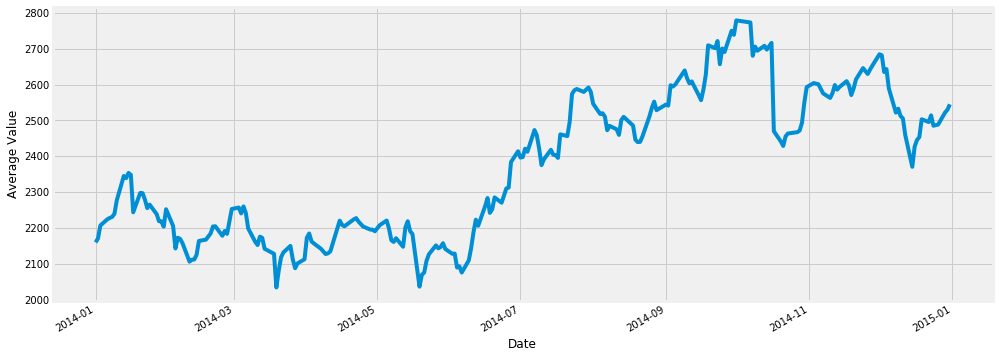

In [4]:
TCS_data.plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [39]:
model1_TCS = ExponentialSmoothing(TCS_data, seasonal_periods=5, trend='add', seasonal='add', damped=True).fit(use_boxcox=False,optimized=True)
model2_TCS = ExponentialSmoothing(TCS_data, seasonal_periods=5, trend='add', seasonal='mul', damped=True).fit(use_boxcox=False,optimized=True)

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [40]:
prediction1_TCS = model1_TCS.forecast(int(len(TCS_data)))

prediction2_TCS = model2_TCS.forecast(int(len(TCS_data)))

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


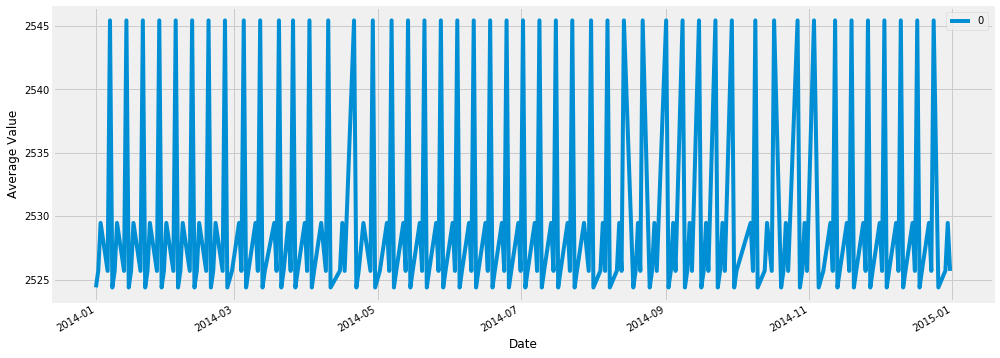

In [41]:
pd.DataFrame(prediction1_TCS.values, index = TCS_data.index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

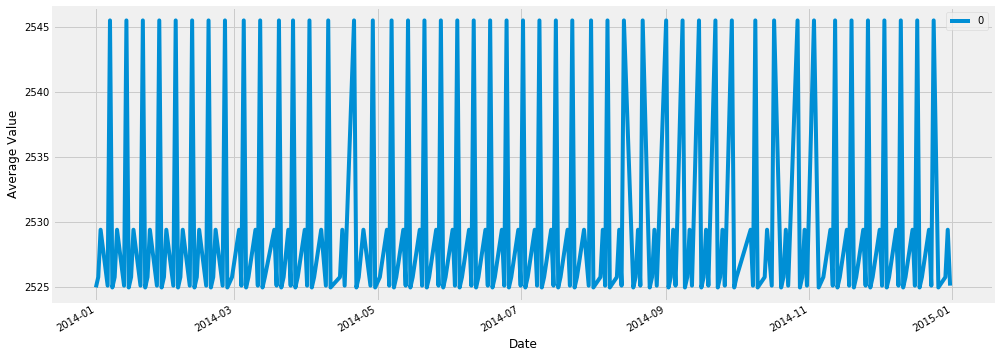

In [42]:
pd.DataFrame(prediction2_TCS.values, index = TCS_data.index).plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

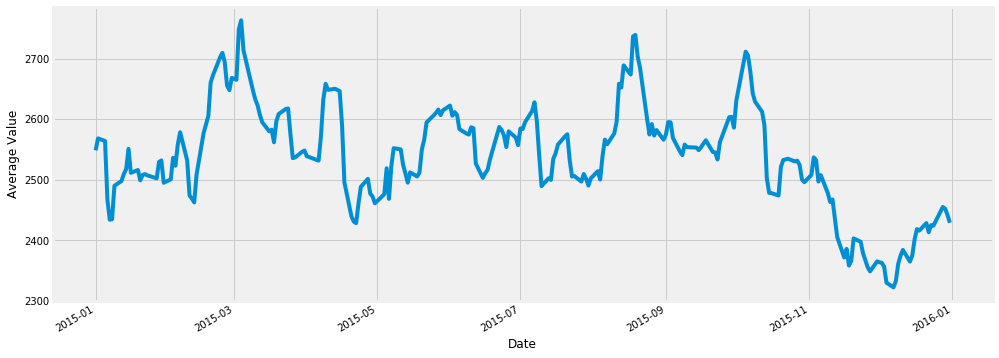

In [43]:
TCS_data_test.plot(figsize=(15, 6))
plt.ylabel('Average Value')
plt.show()

In [44]:
print('RMSE1: ', np.sqrt(mean_squared_error(prediction1_TCS, TCS_data_test.values[:len(prediction1_TCS)])))

print('MAPE1: ', np.mean(np.abs((TCS_data_test.values[:len(prediction1_TCS)] - prediction1_TCS.values) / TCS_data_test.values[:len(prediction1_TCS)])) * 100)

RMSE1:  87.30916888814154
MAPE1:  2.665826069278779


In [45]:
print('RMSE2: ', np.sqrt(mean_squared_error(prediction2_TCS, TCS_data_test.values[:len(prediction2_TCS)])))

print('MAPE2: ', np.mean(np.abs((TCS_data_test.values[:len(prediction2_TCS)] - prediction2_TCS.values) / TCS_data_test.values[:len(prediction2_TCS)])) * 100)

RMSE2:  87.30959764372429
MAPE2:  2.6658355147555692
